In [34]:
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [13]:
url = "https://uk.wikipedia.org/wiki/%D0%9D%D0%B0%D1%81%D0%B5%D0%BB%D0%B5%D0%BD%D0%BD%D1%8F_%D0%A3%D0%BA%D1%80%D0%B0%D1%97%D0%BD%D0%B8"
table = pd.read_html(url, match="Коефіцієнт народжуваності в регіонах України")
df = pd.DataFrame(table[0])

In [14]:
## 1. Display the first rows of the table using the head method

In [15]:
df.head()

,Регіон,1950,1960,1970,1990,2000,2012,2014,2019
0,Крим,230.0,206.0,160.0,130,73,126,—,—
1,Вінницька,224.0,192.0,142.0,124,84,112,109,76
2,Волинська,247.0,250.0,179.0,153,112,148,141,101
3,Дніпропетровська,204.0,204.0,151.0,123,71,112,111,71
4,Донецька,271.0,214.0,140.0,109,61,98,82,—


In [16]:
## 2. Determine the number of rows and columns in the dataframe (shape attribute)

In [17]:
rows, columns = df.shape
print(f"Number of rows: {rows}")
print(f"Number of columns: {columns}")

Number of rows: 28
Number of columns: 9


In [18]:
## 3. Replace the '—' values in the table with NaN values.

In [19]:
df.replace("—", np.nan, inplace=True)

In [20]:
## 4. Determine the types of all columns using dataframe.dtypespd.DataFrame(table[0].dtypes)

In [21]:
df.dtypes

Регіон     object
1950      float64
1960      float64
1970      float64
1990        int64
2000        int64
2012        int64
2014       object
2019       object
dtype: object

In [22]:
## 5. Change the types of non-numeric columns to numeric. Hint - these are the columns where the '—' symbol was located.

In [23]:
df.fillna(0, inplace=True)
df['2014'] = df['2014'].astype(int)
df['2019'] = df['2019'].astype(int)
df.dtypes

Регіон     object
1950      float64
1960      float64
1970      float64
1990        int64
2000        int64
2012        int64
2014        int32
2019        int32
dtype: object

In [24]:
## 6. Calculate the proportion of missing values in each column (use the isnull and sum methods).

In [25]:
null = df.isnull()
print("Null values in column before sum\n", null)
calculate_null = null.sum()
print("\nNull values in column after sum\n", calculate_null)

Null values in column before sum
     Регіон   1950   1960   1970   1990   2000   2012   2014   2019
0    False  False  False  False  False  False  False  False  False
1    False  False  False  False  False  False  False  False  False
2    False  False  False  False  False  False  False  False  False
3    False  False  False  False  False  False  False  False  False
4    False  False  False  False  False  False  False  False  False
5    False  False  False  False  False  False  False  False  False
6    False  False  False  False  False  False  False  False  False
7    False  False  False  False  False  False  False  False  False
8    False  False  False  False  False  False  False  False  False
9    False  False  False  False  False  False  False  False  False
10   False  False  False  False  False  False  False  False  False
11   False  False  False  False  False  False  False  False  False
12   False  False  False  False  False  False  False  False  False
13   False  False  False  Fa

In [26]:
## 7. Delete the data for the entire country from the table, the last row of the table.
df.drop(df.index[-1], inplace=True)
print("Result\n", df)

Result
                Регіон   1950   1960   1970  1990  2000  2012  2014  2019
0                Крим  230.0  206.0  160.0   130    73   126     0     0
1           Вінницька  224.0  192.0  142.0   124    84   112   109    76
2           Волинська  247.0  250.0  179.0   153   112   148   141   101
3    Дніпропетровська  204.0  204.0  151.0   123    71   112   111    71
4            Донецька  271.0  214.0  140.0   109    61    98    82     0
5         Житомирська  261.0  223.0  159.0   129    89   122   120    79
6        Закарпатська  314.0  273.0  207.0   168   115   151   146   104
7          Запорізька  219.0  197.0  150.0   124    71   106   106    68
8   Івано-Франківська  243.0  248.0  182.0   155   103   124   122    88
9            Київська  204.0  189.0  156.0   123    73   122   121    80
10     Кіровоградська  216.0  171.0  145.0   126    79   110   108    68
11          Луганська  262.0  235.0  144.0   116    62    96    51     0
12          Львівська  234.0  240.0  171.0 

In [27]:
## 8. Replace missing data in columns with the average values of these columns (using the fillna method).
df.drop('Регіон', axis=1).mean(numeric_only=True).round(0)
df.fillna(_, inplace=True)
df

,Регіон,1950,1960,1970,1990,2000,2012,2014,2019
0,Крим,230.0,206.0,160.0,130,73,126,0,0
1,Вінницька,224.0,192.0,142.0,124,84,112,109,76
2,Волинська,247.0,250.0,179.0,153,112,148,141,101
3,Дніпропетровська,204.0,204.0,151.0,123,71,112,111,71
4,Донецька,271.0,214.0,140.0,109,61,98,82,0
5,Житомирська,261.0,223.0,159.0,129,89,122,120,79
6,Закарпатська,314.0,273.0,207.0,168,115,151,146,104
7,Запорізька,219.0,197.0,150.0,124,71,106,106,68
8,Івано-Франківська,243.0,248.0,182.0,155,103,124,122,88
9,Київська,204.0,189.0,156.0,123,73,122,121,80


In [28]:
## 9. Get a list of regions where the birth rate in 2019 was higher than the average in Ukraine.
average_birth_rate_2019 = df['2019'].mean()
regions_above_average_2019 = df[df['2019'] > average_birth_rate_2019]['Регіон'].tolist()
regions_above_average_2019


['Вінницька',
 'Волинська',
 'Дніпропетровська',
 'Житомирська',
 'Закарпатська',
 'Івано-Франківська',
 'Київська',
 'Львівська',
 'Миколаївська',
 'Одеська',
 'Рівненська',
 'Тернопільська',
 'Херсонська',
 'Хмельницька',
 'Чернівецька',
 'Київ']

In [29]:
## 10. Which region had the highest birth rate in 2014?
region_with_highest_birth_rate_2014 = df.loc[df['2014'].idxmax(), 'Регіон']
print("Region with the highest birth rate in 2014:", region_with_highest_birth_rate_2014)


Region with the highest birth rate in 2014: Рівненська


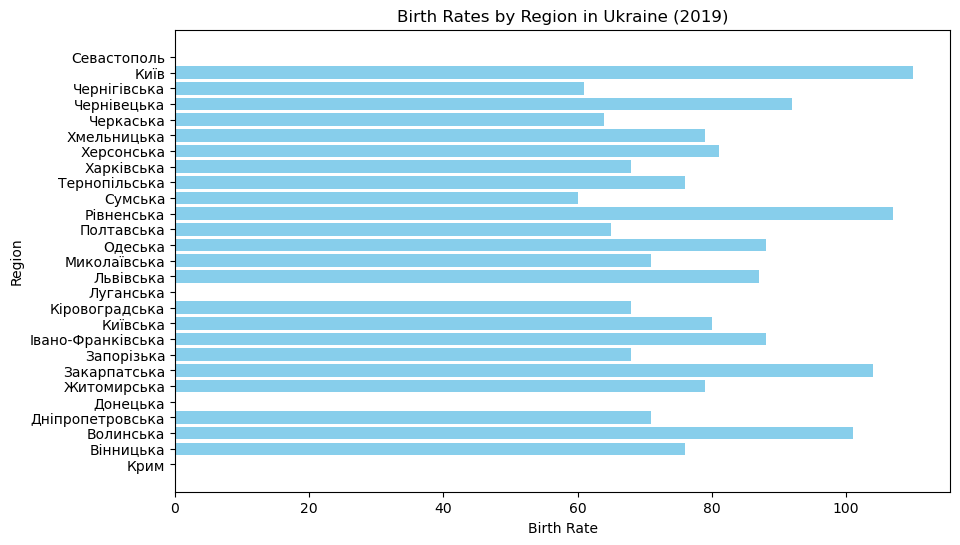

In [30]:
## 11.  Create a bar chart of birth rates by region for the year 2019
plt.figure(figsize=(10, 6))
plt.barh(df['Регіон'], df['2019'], color='skyblue')
plt.xlabel('Birth Rate')
plt.ylabel('Region')
plt.title('Birth Rates by Region in Ukraine (2019)')
plt.show()

___Visualization___

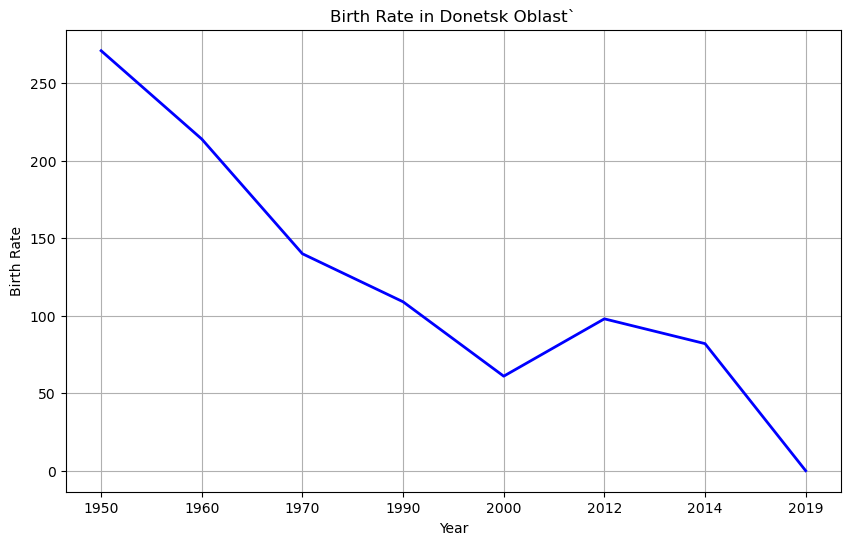

In [32]:
# Creating a line plot

region_data = df[df['Регіон'] == 'Донецька'].iloc[0, 1:]
years = df.columns[1:]

plt.figure(figsize=(10, 6))
plt.plot(years, region_data, color='blue', linestyle='-', linewidth=2)
plt.title('Birth Rate in Donetsk Oblast`')
plt.xlabel('Year')
plt.ylabel('Birth Rate')
plt.grid(True)
plt.show()

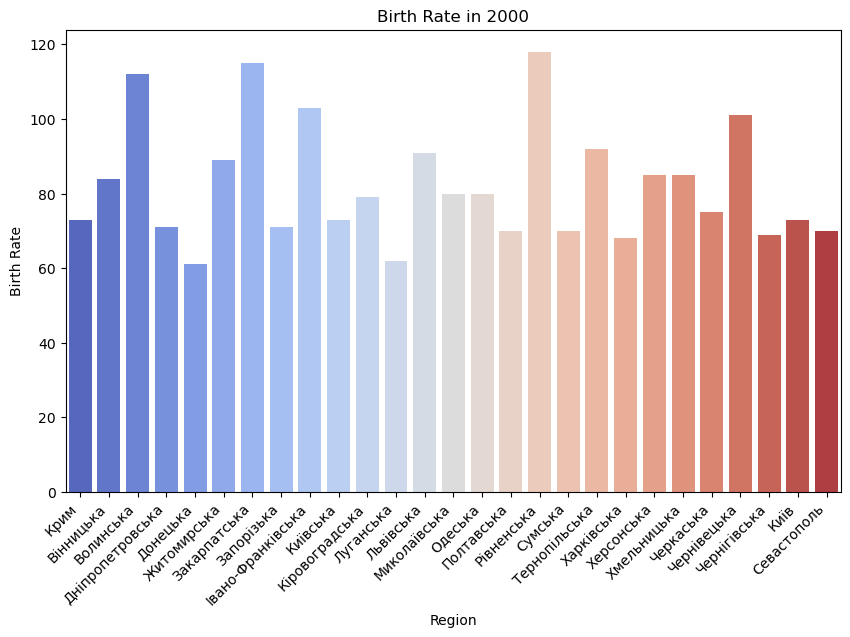

In [43]:
# Creating Bar plot

x = df['Регіон']
y = df['2000']

plt.figure(figsize=(10, 6))
sns.barplot(x=x, y=y, palette='coolwarm')
plt.title('Birth Rate in 2000')
plt.xlabel('Region')
plt.ylabel('Birth Rate')
plt.xticks(rotation=45, ha='right')
plt.show()

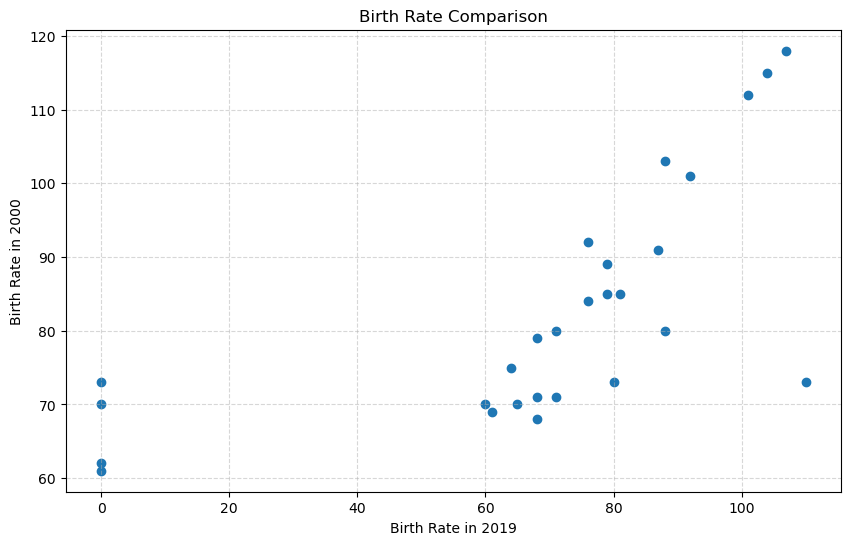

In [50]:
# Scatter Plot

x = df['2019']
y = df['2000']

plt.figure(figsize=(10, 6))
plt.scatter(x=x, y=y)
plt.title('Birth Rate Comparison')
plt.xlabel('Birth Rate in 2019')
plt.ylabel('Birth Rate in 2000')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

Text(0.5, 1.0, 'Proportion of Birth Rates by Region in 2012')

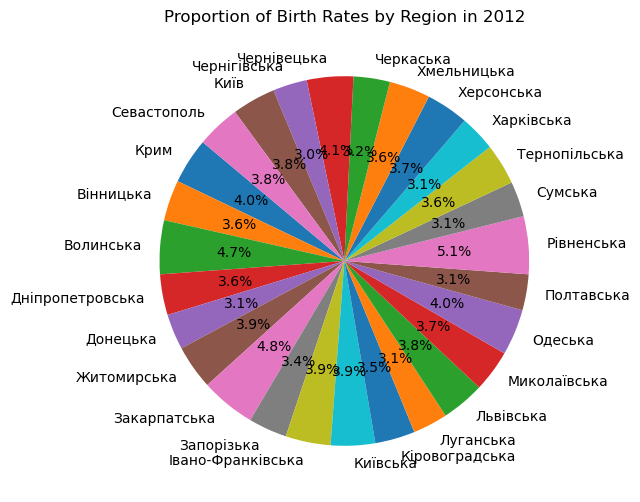

In [74]:
# Pie chart

x = df['2012']
y = df['Регіон']

plt.figure(figsize=(10, 6))
plt.pie(x=x, labels=y, autopct='%1.1f%%', startangle=140)
plt.title('Proportion of Birth Rates by Region in 2012')